# 1.Загрузить файл hr.csv.¶


In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [2]:
df=pd.read_csv('HR.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).¶

In [4]:
df.describe() #(среднее,медиана,мин/макс,сред.отклонение)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.mode() # мода для всего df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

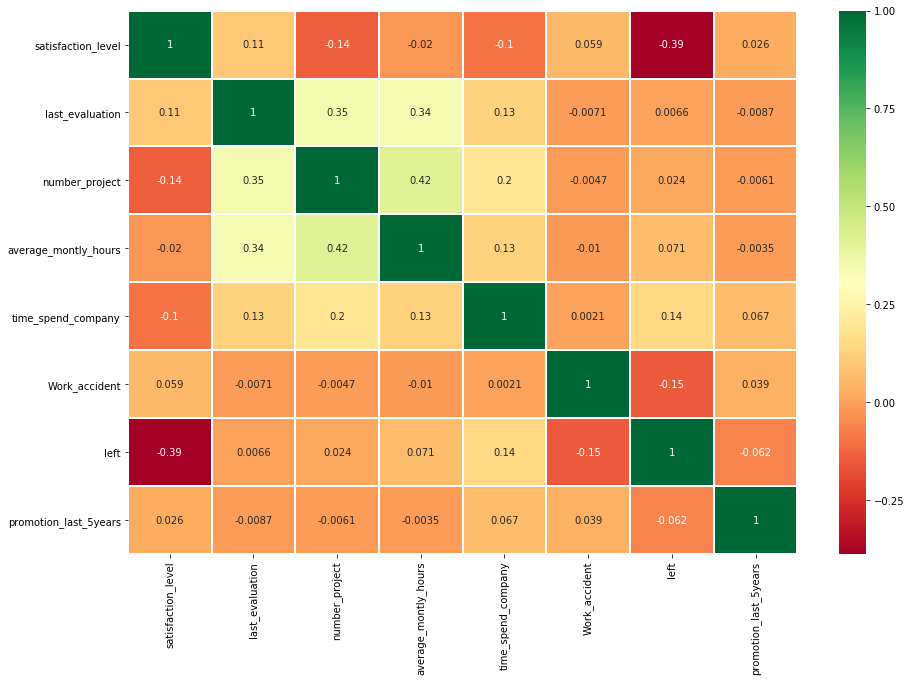

In [199]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1)  #df.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

# 4.Визуализировать несколько взаимосвязей между переменными.

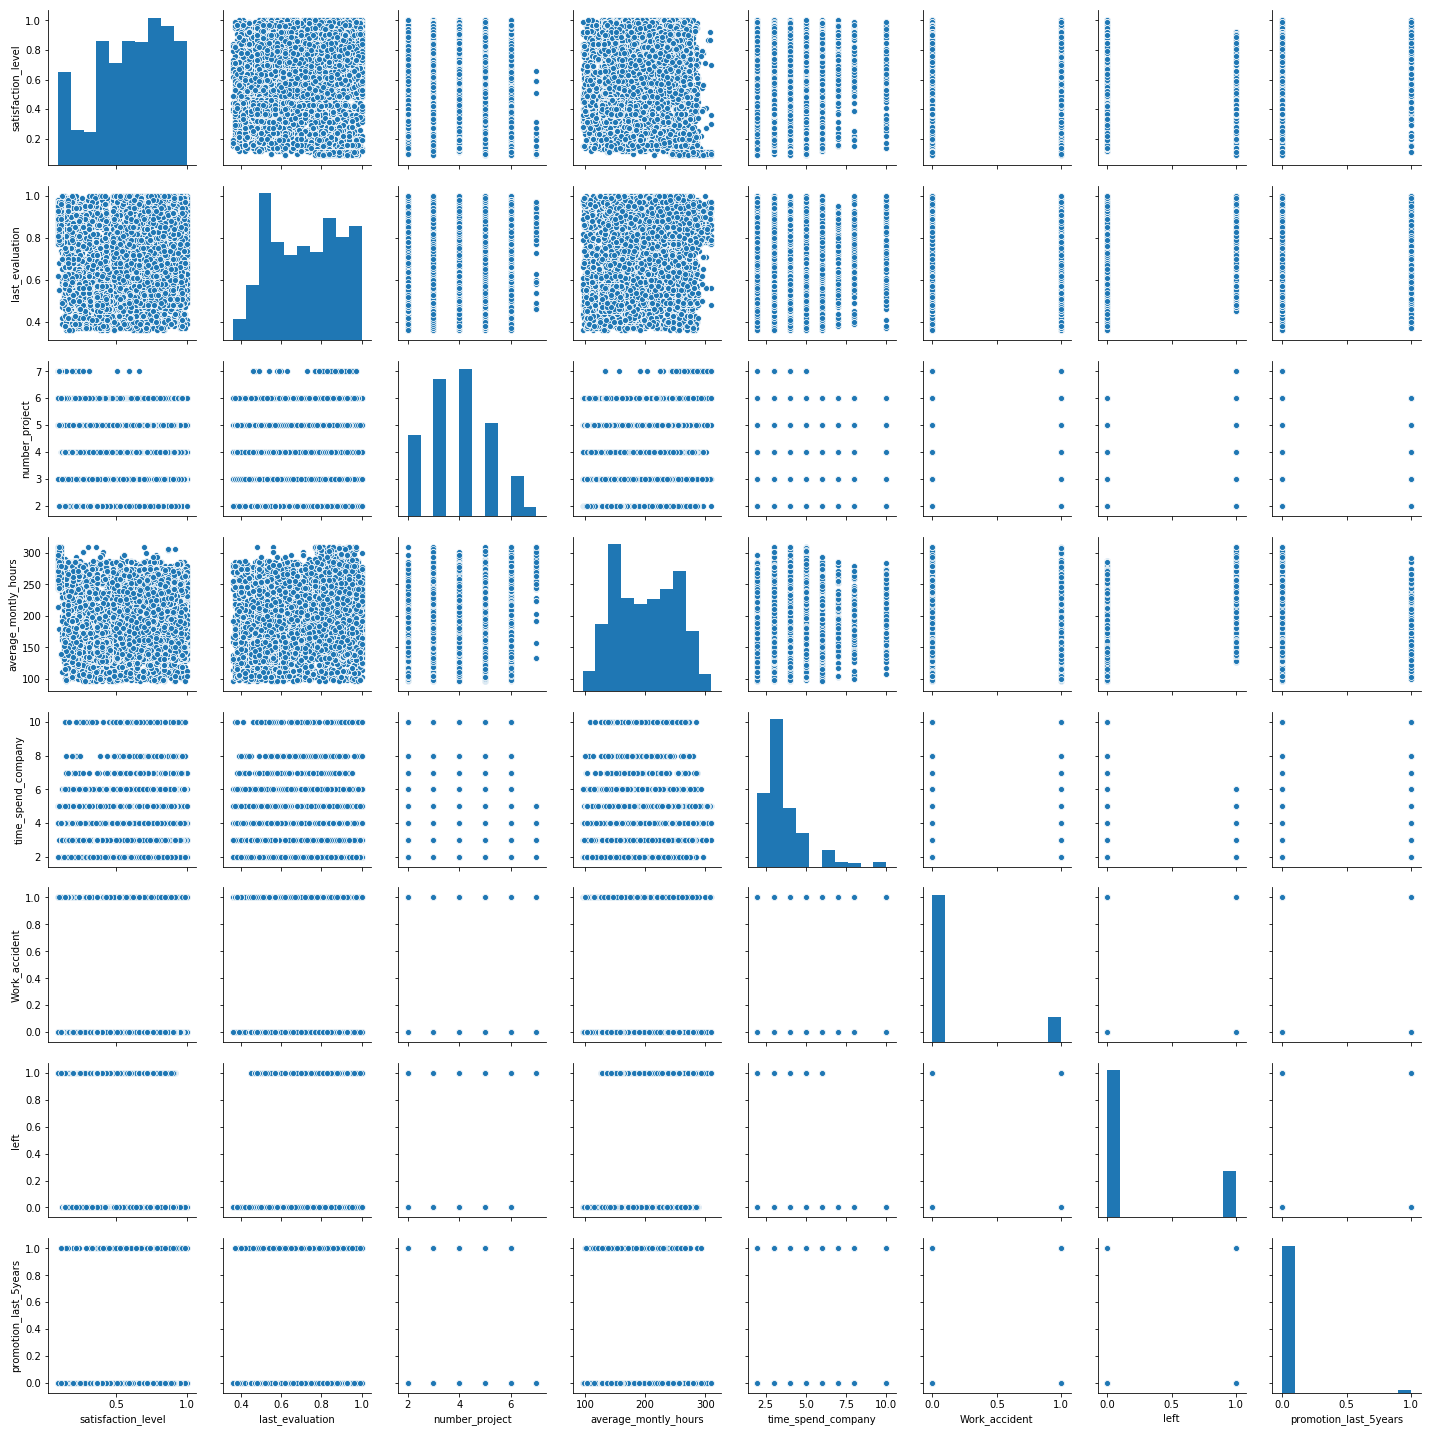

In [7]:
sns.pairplot(df)

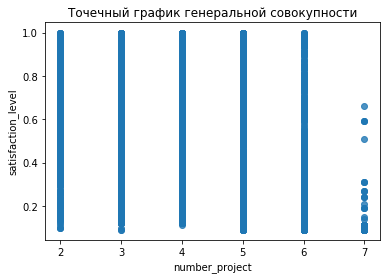

In [24]:
satisfaction_level = df['satisfaction_level']
number_project = df['number_project']
sns.regplot(x=number_project,y= satisfaction_level,data=df, fit_reg=False)
plt.ylabel('satisfaction_level')
plt.xlabel('number_project')
plt.title('Точечный график генеральной совокупности')
plt.show()

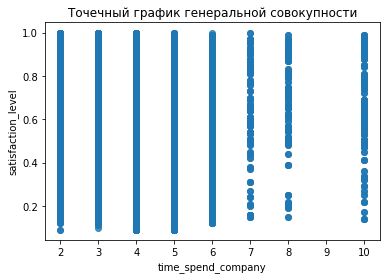

In [14]:
time_spend_company = df['time_spend_company']
sns.regplot(x=time_spend_company,y= satisfaction_level, data=df, fit_reg=False)
plt.ylabel('satisfaction_level')
plt.xlabel('time_spend_company')
plt.title('Точечный график генеральной совокупности')
plt.show()

Странным показалось то, что у нас отсутствуют люди, проработавшие 9 лет. Возможно в это время просто не нанимали сотрудников.

In [23]:
df['time_spend_company'].value_counts().sort_index()

2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: time_spend_company, dtype: int64

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [445]:
from scipy.stats import ttest_ind
ttest_ind(df['satisfaction_level'], df['time_spend_company'])

Ttest_indResult(statistic=-238.58170166684755, pvalue=0.0)

In [446]:
ttest_ind(df['left'], df['Work_accident'])

Ttest_indResult(statistic=20.724471296371643, pvalue=9.625063899986344e-95)

In [447]:
ttest_ind(df['last_evaluation'], df['left'])

Ttest_indResult(statistic=127.53627018536089, pvalue=0.0)

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [34]:
df[df['left'].isin([0])]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам.

In [39]:
# Расчет по всем сотрудникам
df_salary_all = df['salary'].value_counts()
df_salary_all

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

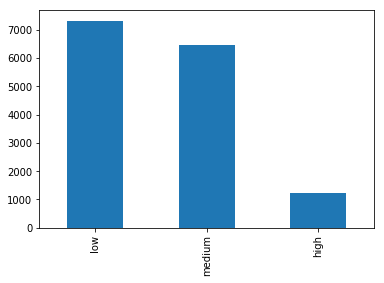

In [42]:
df_salary_all.plot.bar()

In [40]:
# Расчет только по оставшимся сотрудникам
df_salary = df[df['left'].isin([0])]['salary'].value_counts()
df_salary

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

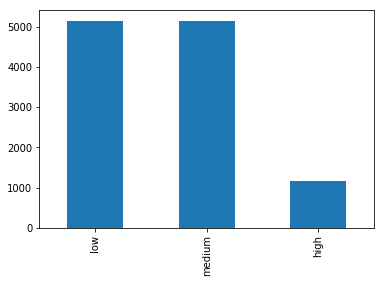

In [41]:
df_salary.plot.bar()

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [212]:
# по всем сотрудникам + уволенные
df_all = df.groupby([ "sales", "salary"]).count()
df_all= pd.DataFrame(grouped_df.size().reset_index(name = "counts")) 
df_all

,sales,salary,counts
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


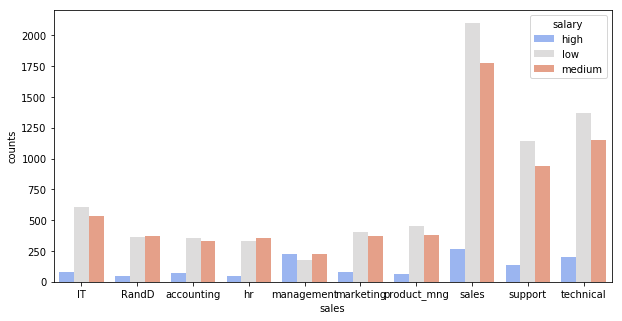

In [215]:
plt.figure(figsize=(10,5))
sns.barplot(x='sales',y='counts', hue= 'salary', data=df_all, palette='coolwarm')

In [213]:
# по всем сотрудникам - уволенные
df_stay = df[df['left'].isin([0])]
df_stay = df_stay.groupby(['sales'])['salary'].count()
df_stay= pd.DataFrame(grouped_df.size().reset_index(name = "counts")) 
df_stay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
sales     30 non-null object
salary    30 non-null object
counts    30 non-null int64
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


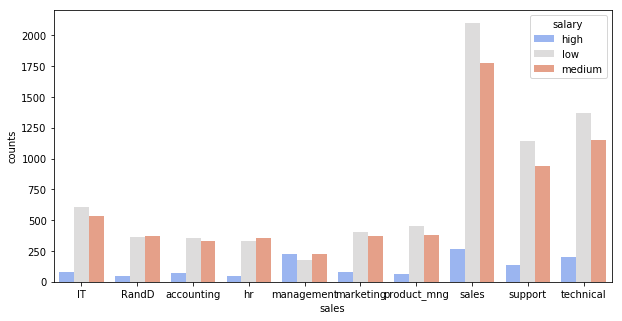

In [216]:
plt.figure(figsize=(10,5))
sns.barplot(x='sales',y='counts', hue= 'salary', data=df_stay, palette='coolwarm')

# 9.Сколько сотрудников покинули компанию.

In [217]:
df[df.left.isin([1])].left.count()

3571

# 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [509]:
# Разделим дата сет на зависимую и независимые переменные
X = df.drop('left', 1).iloc[:].values
y = df['left'].iloc[:].values

In [510]:
# Нашла в интернете неплохой способ быстро закодировать категориальные переменные, 
# не знаю насколько хорош способ, вроде работает
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, -1] = labelencoder_X.fit_transform(X[:, -1])
X[:, -2] = labelencoder_X.fit_transform(X[:, -2])
onehotencoder = OneHotEncoder(categorical_features = [-1])
onehotencoder = OneHotEncoder(categorical_features = [-2])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [511]:
# разделим датасет на тренировочные и тестовые данные
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [512]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [513]:
# построим модель логистической регрессии
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
classifier.fit(X, y)

/home/igreevaveronika/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [514]:
# построим вектор предсказанных значений
y_pred = classifier.predict(X_test)

In [515]:
# проверим количество верных и неверных значений
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1576,  718],
       [ 216,  490]])

In [516]:
# то же самое с коэффициентами
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      2294
           1       0.41      0.69      0.51       706

    accuracy                           0.69      3000
   macro avg       0.64      0.69      0.64      3000
weighted avg       0.77      0.69      0.71      3000



In [517]:
classifier.coef_

array([[-1.79871237, -0.16742298, -0.1199604 ,  0.00347285,  0.13109056,
        -0.82056649, -0.20577534,  0.03872954,  0.06084601]])

Если верить коэффициентам логистической модели, больше всего изменяется значение satisfaction_level	при изменении left, причем в обратную сторону. То есть чем выше коэффициент satisfaction_level, тем больше вероятность, что сотрудник останется в компании. Нулевую гипотезу сформулируем так: left не зависит от satisfaction_level. Уровень значимости установим = 0.05. Проверим эту гипотезу при помощи критерия Манна-Уитни. P-value < 0.05. У нас есть основания отвергнуть нулевую гипотезу. 

In [532]:
stats.mannwhitneyu(df['left'], df['satisfaction_level'])

Ttest_indResult(statistic=-93.06077566920372, pvalue=0.0)

По аналогии проверим самый низкий коэффициент логистической регрессии average_montly_hours. Нулевую гипотезу сформулируем так: left  не зависит от average_montly_hours. Уровень значимости установим = 0.05. Проверим эту гипотезу при помощи критерия Манна-Уитни. P-value < 0.05. У нас есть основания отвергнуть нулевую гипотезу. 

In [527]:
stats.mannwhitneyu(df['left'], df['average_montly_hours'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

Проверим гипотезу, что left не зависит от отдела, в котором работает сотрудник. Уровень значимости установим = 0.05. Проверим эту гипотезу при помощи критерия Манна-Уитни. P-value < 0.05. У нас есть основания отвергнуть нулевую гипотезу. 

In [522]:
df['sales1'] = df['sales']
df.loc[df['sales'] == 'IT', 'sales1'] = 0
df.loc[df['sales'] == 'RandD', 'sales1'] = 1
df.loc[df['sales'] == 'accounting', 'sales1'] = 2
df.loc[df['sales'] == 'hr', 'sales1'] = 3
df.loc[df['sales'] == 'management', 'sales1'] = 4
df.loc[df['sales'] == 'marketing', 'sales1'] = 5
df.loc[df['sales'] == 'product_mng', 'sales1'] = 6
df.loc[df['sales'] == 'sales', 'sales1'] = 7
df.loc[df['sales'] == 'support', 'sales1'] = 8
df.loc[df['sales'] == 'technical', 'sales1'] = 9

In [533]:
stats.mannwhitneyu(df['left'], df['sales1'])

MannwhitneyuResult(statistic=12797883.5, pvalue=0.0)

Проверим гипотезу, что left не зависит от уровня заработной платы. Уровень значимости установим = 0.05. Проверим эту гипотезу при помощи критерия Манна-Уитни. P-value < 0.05. У нас есть основания отвергнуть нулевую гипотезу.

In [524]:
df['salary1'] = df['salary']
df.loc[df['salary'] == 'low', 'salary1'] = 0
df.loc[df['salary'] == 'medium', 'salary1'] = 1
df.loc[df['salary'] == 'high', 'salary1'] = 2

In [534]:
stats.mannwhitneyu(df['left'], df['salary1'])

MannwhitneyuResult(statistic=79438393.0, pvalue=0.0)

In [535]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales1,salary1
0,0.38,0.53,2,157,3,0,1,0,sales,low,7,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,7,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,7,0
